In [1]:
import os
os.chdir('/blue/npadillacoreano/mcum/SocialMemEphys/diff_fam_social_memory_ephys')
import spikeinterface.preprocessing as sp
import spikeinterface.extractors as se 
import lfp.lfp_analysis.LFP_collection as LFP_collection
import lfp.lfp_analysis.LFP_recording as LFP_recording


In [3]:
cups_lfp_json = "data/cups_lfp/lfp_collection.json"

cups_collection = LFP_collection.LFPCollection.load_collection(cups_lfp_json)

In [56]:
for recording in cups_collection.recordings: 
        print(recording.name)
        print(recording.traces.shape)
        print(recording.first_timestamp)

23_cups_p4_merged.rec
(2520658, 5)
3277582
13_cups_p4_merged.rec
(2581551, 5)
1937446
32_cups_p4_merged.rec
(2532337, 5)
1661658
22_cups_p4_merged.rec
(2604097, 5)
1480109
11_cups_p4_merged.rec
(2595089, 5)
1675517
31_cups_p4_merged.rec
(2529885, 5)
3373207
21_cups_p4_merged.rec
(2520850, 5)
1786386
41_cups_p4_merged.rec
(2530647, 5)
1967935
44_cups_p4_merged.rec
(2530435, 5)
1355381
24_cups_p4_merged.rec
(2460770, 5)
1906957


In [2]:
rec_path = r"./data/cups_raw/11_cups_p4.rec/11_cups_p4_merged.rec"
recording = se.read_spikegadgets(rec_path, stream_id = "trodes")
raw_traces= recording.get_traces()
raw_traces
print(raw_traces.shape)

(51901798, 32)


In [3]:

recording_notched = sp.notch_filter(recording, freq=60)
recording = sp.bandpass_filter(recording, freq_min=0.5, freq_max=300)
recording = sp.resample(recording, resample_rate=1000)
downsampled_traces = recording.get_traces()
print(recording)
print(downsampled_traces.shape)

ResampleRecording: 32 channels - 1.0kHz - 1 segments - 2,595,089 samples 
                   2,595.09s (43.25 minutes) - int16 dtype - 158.39 MiB
(2595089, 32)


In [64]:
import trodes.read_exported as tr

In [72]:
rec_data = tr.read_trodes_extracted_data_file(r"data/cups_raw/11_cups_p4.rec/11_cups_p4_merged.time/11_cups_p4_merged.timestamps.dat")

print('total: ', len(rec_data['data']))
print('first', rec_data['first_timestamp'])
print( int(len(rec_data['data'])) - int(rec_data['first_timestamp'])) 


total:  51902200
first 1675517
50226683


In [80]:
1675517 / 20000 # time from stream to play (s)

83.77585

In [88]:
400 / 20000 

0.02

In [77]:
2595.090 * 20000


51901800.0

In [79]:
2595.090 / 60 # has to be lenght of recorded data, not from stream , from play to end (min)

43.2515

In [76]:
print(recording)

BandpassFilterRecording: 32 channels - 1 segments - 20.0kHz - 2595.090s


In [84]:
print(rec_data['data'][0:10])

[([1675517], [1727967176620227400]) ([1675518], [1727967176620228900])
 ([1675519], [1727967176620230300]) ([1675520], [1727967176620231800])
 ([1675521], [1727967176620233100]) ([1675522], [1727967176620234400])
 ([1675523], [1727967176620235700]) ([1675524], [1727967176620237000])
 ([1675525], [1727967176620238200]) ([1675526], [1727967176620239500])]


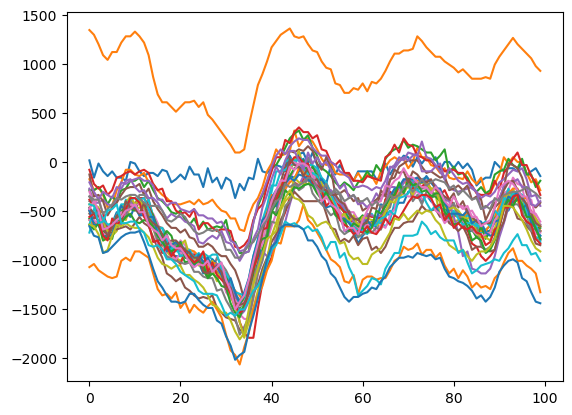

In [83]:
import matplotlib.pyplot as plt

plt.plot(raw_traces[0:100, :])

In [17]:
trimmed_traces = recording.get_traces(start_frame = 1675517)

In [18]:
trimmed_traces.shape

(0, 32)

In [23]:
channel_map = {'mPFC': 19, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}

In [54]:
from importlib import reload
reload(LFP_recording)
rec = LFP_recording.LFPRecording(subject = '1.1', channel_dict = channel_map, merged_rec_path = rec_path) 

Processing 11_cups_p4_merged.rec


In [55]:
rec.traces.shape

(0, 5)